In [3]:
import pandas as pd

sensus= {
     'tinggi':[158,170,183,191,155,163,180,158,178],
     'berat':[64,86,84,80,49,59,67,54,67],
     'jk':[
         'pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita'
     ]
}
sensus_df=pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


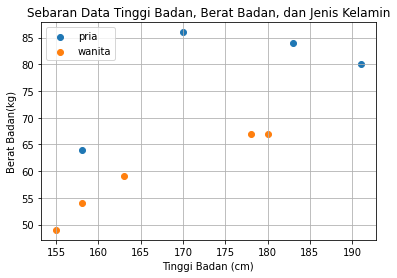

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk,d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)
plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan(kg)')
plt.grid(True)
plt.show()

In [5]:
import numpy as np
X_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [6]:
from sklearn.preprocessing import LabelBinarizer

lb= LabelBinarizer()
y_train= lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [7]:
y_train=y_train.flatten()
print(f'y_train:{y_train}')

y_train:[0 0 0 0 1 1 1 1 1]


In [8]:
from sklearn.neighbors import KNeighborsClassifier

K=3
model=KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
tinggi_badan=155
berat_badan=70
X_new=np.array([tinggi_badan, berat_badan]).reshape(1,-1)
X_new

array([[155,  70]])

In [11]:
y_new=model.predict(X_new)
y_new

array([1])

In [13]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

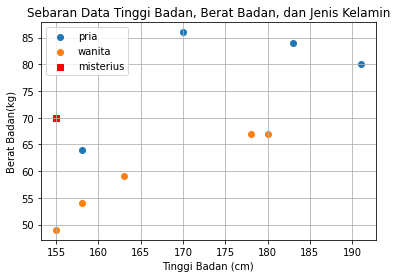

In [15]:
fig, ax = plt.subplots()
for jk,d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)
plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')
plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan(kg)')
plt.grid(True)
plt.show()

In [16]:
misterius=np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [17]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [18]:
from scipy.spatial.distance import euclidean
data_jarak=[euclidean(misterius,d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [19]:
sensus_df['jarak']=data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [20]:
X_test=np.array([[168,65],[180,96],[160,52],[169,67]])
y_test=lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


In [21]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [22]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,y_pred)

print(f'Accuracy:{acc}')

Accuracy:0.75


In [23]:
from sklearn.metrics import precision_score

acc=precision_score(y_test,y_pred)

print(f'Precision:{acc}')

Precision:0.6666666666666666


In [25]:
from sklearn.metrics import recall_score

acc=recall_score(y_test,y_pred)

print(f'Recall:{acc}')

Recall:1.0


In [26]:
from sklearn.metrics import f1_score

acc=f1_score(y_test,y_pred)

print(f'F1-score:{acc}')

F1-score:0.8


In [29]:
from sklearn.metrics import classification_report

cls_report=classification_report(y_test,y_pred)

print(f'Classification Report:{cls_report}')

Classification Report:              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [30]:
from sklearn.metrics import matthews_corrcoef

mcc=matthews_corrcoef(y_test,y_pred)

print(f'MCC:{mcc}')

MCC:0.5773502691896258
